In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_log = pd.read_csv('sinr_drop_log.csv')
df_log.columns = ['Time', 'SINR', 'Packet', 'Receive', 'Sender', 'X', 'Y', 'Z']

In [8]:
df_log.head()

,Time,SINR,Packet,Receive,Sender,X,Y,Z
0,30.325776,6.99637,aodv::Rreq,148,515,699.390,698.578,0
1,30.325776,7.83133,aodv::Rreq,148,169,677.437,717.805,0
2,30.325776,5.16091,aodv::Rreq,148,578,714.000,692.000,0
3,30.325776,10.00780,aodv::Rreq,148,471,660.090,550.849,0
4,30.325776,15.02750,aodv::Rreq,148,269,551.208,620.630,0


In [14]:
df_log.rename(columns={'Receive' : 'TX_ID', 'Sender' : 'RX_ID'}, inplace=True)

In [15]:
df_log.head()

,Time,SINR,Packet,TX_ID,RX_ID,X,Y,Z
0,30.325776,6.99637,aodv::Rreq,148,515,699.390,698.578,0
1,30.325776,7.83133,aodv::Rreq,148,169,677.437,717.805,0
2,30.325776,5.16091,aodv::Rreq,148,578,714.000,692.000,0
3,30.325776,10.00780,aodv::Rreq,148,471,660.090,550.849,0
4,30.325776,15.02750,aodv::Rreq,148,269,551.208,620.630,0


In [19]:
df_filter_V01 = df_log[['Time', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y']]

In [20]:
df_filter_V01.head()

,Time,Packet,TX_ID,RX_ID,X,Y
0,30.325776,aodv::Rreq,148,515,699.390,698.578
1,30.325776,aodv::Rreq,148,169,677.437,717.805
2,30.325776,aodv::Rreq,148,578,714.000,692.000
3,30.325776,aodv::Rreq,148,471,660.090,550.849
4,30.325776,aodv::Rreq,148,269,551.208,620.630


In [59]:
test = {1:[1, 2], 2:[3, 4], 3:[5, 6]}

In [61]:
test[1]

[1, 2]

In [91]:
df_freq = {}

for time, packet, tx, rx, x, y in df_filter_V01.values:
    if df_freq.get(tx) is None :
        df_freq[tx] = [1, {0:[x, y]}]
    else :
        df_freq[tx][0] += 1
        df_freq[tx][1][df_freq[tx][0]] = [x, y]


In [95]:
df_freq.get(33)

[1060,
 {0: [938.086, 634.099],
  2: [836.167, 731.873],
  3: [870.478, 626.205],
  4: [854.766, 632.783],
  5: [847.826, 639.158],
  6: [954.0, 779.0],
  7: [925.144, 606.801],
  8: [857.531, 721.223],
  9: [943.033, 769.127],
  10: [928.591, 616.603],
  11: [869.966, 629.896],
  12: [839.972, 729.976],
  13: [918.513, 783.337],
  14: [915.229, 607.217],
  15: [851.308, 634.23],
  16: [908.078, 784.431],
  17: [996.124, 741.1],
  18: [1000.63, 743.459],
  19: [832.636, 642.083],
  20: [947.283, 597.536],
  21: [850.371, 724.792],
  22: [935.892, 772.249],
  23: [992.31, 734.068],
  24: [923.341, 781.226],
  25: [832.811, 733.546],
  26: [843.928, 637.32],
  27: [901.129, 787.556],
  28: [999.762, 743.844],
  29: [935.558, 629.441],
  30: [850.371, 724.792],
  31: [876.468, 627.176],
  32: [935.892, 772.249],
  33: [926.401, 612.568],
  34: [908.973, 610.099],
  35: [992.31, 734.068],
  36: [923.341, 781.226],
  37: [832.811, 733.546],
  38: [843.928, 637.32],
  39: [901.129, 787.556],

In [131]:
print([v[0] for v in df_freq[33][1].values()])

[938.086, 836.167, 870.478, 854.766, 847.826, 954.0, 925.144, 857.531, 943.033, 928.591, 869.966, 839.972, 918.513, 915.229, 851.308, 908.078, 996.124, 1000.63, 832.636, 947.283, 850.371, 935.892, 992.31, 923.341, 832.811, 843.928, 901.129, 999.762, 935.558, 850.371, 876.468, 935.892, 926.401, 908.973, 992.31, 923.341, 832.811, 843.928, 901.129, 999.762, 942.218, 931.851, 880.5, 988.496, 901.595, 843.211, 928.562, 930.313, 922.95, 996.912, 836.555, 893.845, 825.651, 1008.03, 915.17, 821.937, 821.821, 828.89, 935.197, 883.25, 886.835, 927.555, 980.869, 914.176, 915.17, 940.978, 821.937, 821.821, 984.552, 915.876, 828.89, 1002.08, 990.977, 884.35, 926.0, 929.456, 872.072, 916.092, 843.463, 921.468, 973.241, 834.802, 952.417, 907.342, 993.591, 984.086, 807.097, 976.271, 993.591, 984.086, 976.271, 807.097, 807.097, 940.495, 884.35, 926.0, 929.456, 872.072, 873.273, 916.092, 843.463, 921.468, 973.241, 834.802, 952.417, 907.342, 993.591, 984.086, 976.271, 807.097, 864.692, 927.81, 910.765, 8

In [134]:

print([v[0] for v in df_freq.get(33)[1].values()])


[938.086, 836.167, 870.478, 854.766, 847.826, 954.0, 925.144, 857.531, 943.033, 928.591, 869.966, 839.972, 918.513, 915.229, 851.308, 908.078, 996.124, 1000.63, 832.636, 947.283, 850.371, 935.892, 992.31, 923.341, 832.811, 843.928, 901.129, 999.762, 935.558, 850.371, 876.468, 935.892, 926.401, 908.973, 992.31, 923.341, 832.811, 843.928, 901.129, 999.762, 942.218, 931.851, 880.5, 988.496, 901.595, 843.211, 928.562, 930.313, 922.95, 996.912, 836.555, 893.845, 825.651, 1008.03, 915.17, 821.937, 821.821, 828.89, 935.197, 883.25, 886.835, 927.555, 980.869, 914.176, 915.17, 940.978, 821.937, 821.821, 984.552, 915.876, 828.89, 1002.08, 990.977, 884.35, 926.0, 929.456, 872.072, 916.092, 843.463, 921.468, 973.241, 834.802, 952.417, 907.342, 993.591, 984.086, 807.097, 976.271, 993.591, 984.086, 976.271, 807.097, 807.097, 940.495, 884.35, 926.0, 929.456, 872.072, 873.273, 916.092, 843.463, 921.468, 973.241, 834.802, 952.417, 907.342, 993.591, 984.086, 976.271, 807.097, 864.692, 927.81, 910.765, 8

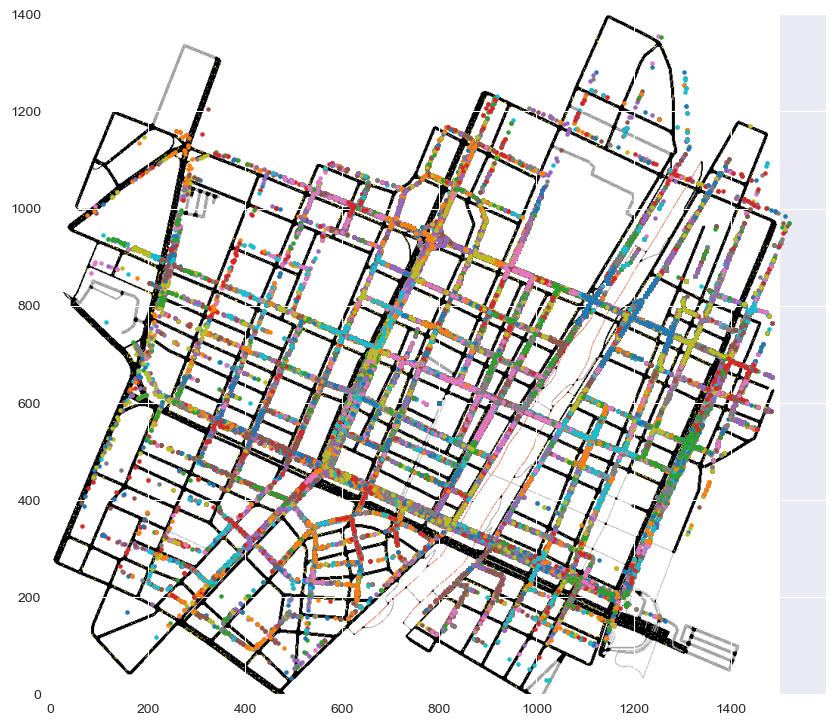

In [170]:
import matplotlib.image as img
plt.figure(figsize=(10., 10))
bg = img.imread('background.png')
extent = [0, 1500, 0, 1400]
plt.imshow(bg, extent=extent, zorder=0, origin='lower')

for k in df_freq.keys() :
    plt.scatter([v[0] for v in df_freq.get(k)[1].values()], [v[1] for v in df_freq.get(k)[1].values()], s=5)
plt.show()

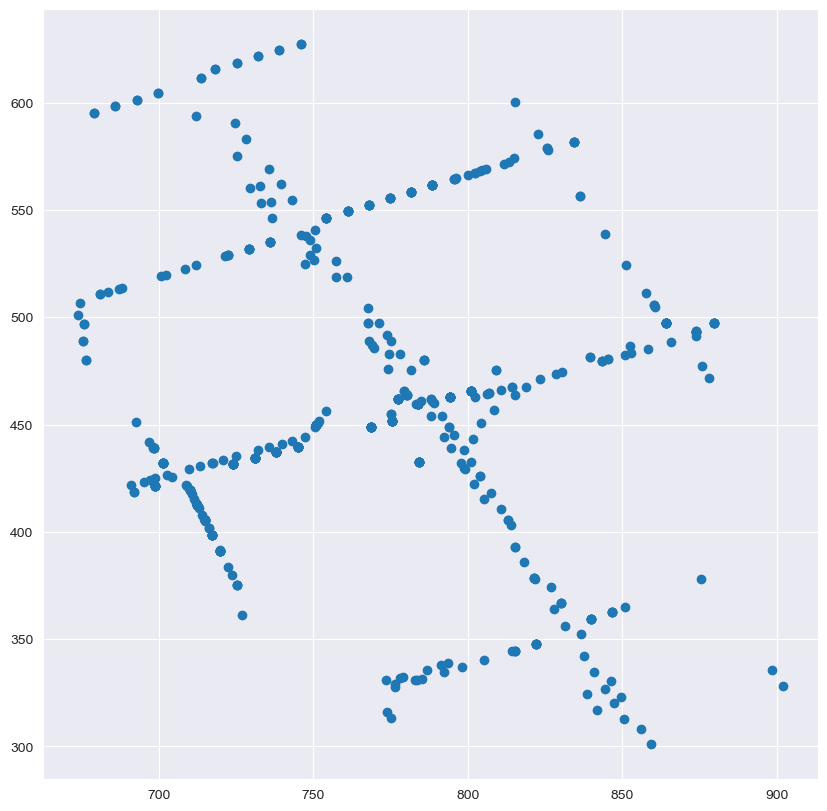

In [148]:
plt.figure(figsize=(10, 10))
plt.scatter([v[0] for v in df_freq.get(1)[1].values()], [1400 - v[1] for v in df_freq.get(1)[1].values()])
plt.show()

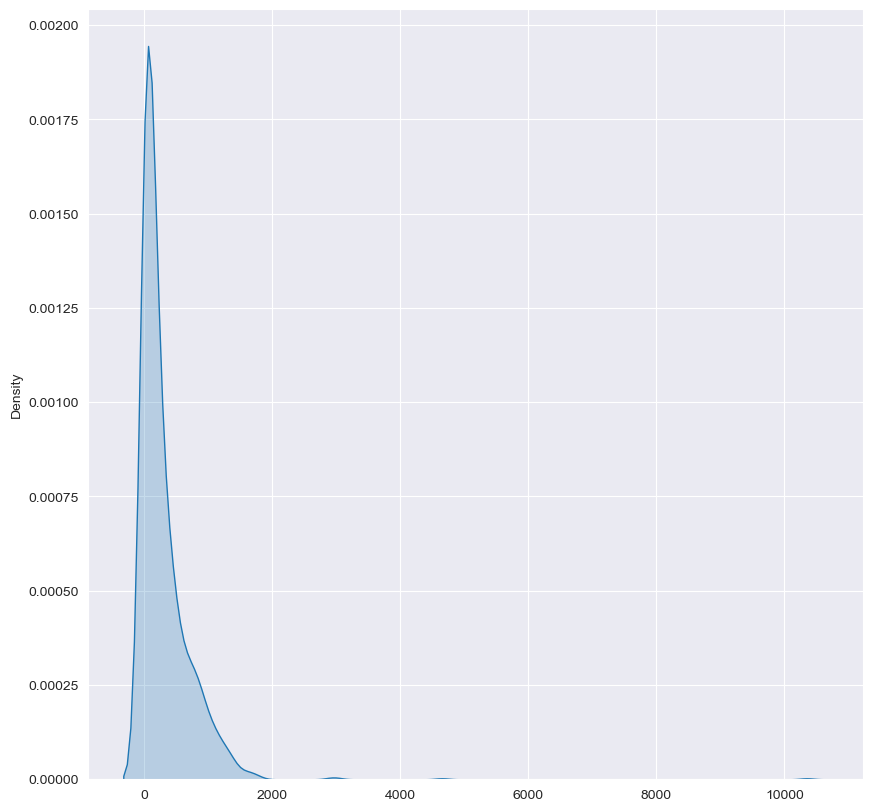

In [82]:
plt.figure(figsize = (10,10))
sns.kdeplot([v[0] for v in df_freq.values()],fill=True)
plt.show()